# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
data= pd.read_csv('/Users/dehilinesma/Downloads/Lab 9 - Unsupervised-Learning/data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
data.head(1)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338


In [4]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<AxesSubplot:>

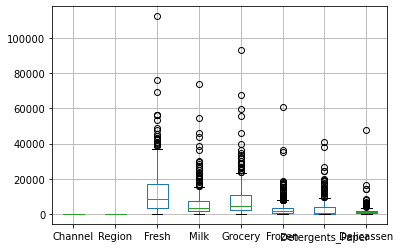

In [7]:
data.boxplot()

array([[<AxesSubplot:title={'center':'Channel'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Fresh'}>],
       [<AxesSubplot:title={'center':'Milk'}>,
        <AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>],
       [<AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicassen'}>, <AxesSubplot:>]],
      dtype=object)

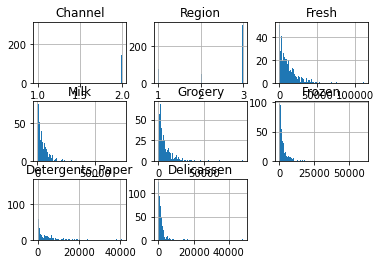

In [8]:
data.hist(bins=100)

In [9]:
# Your observations here
## data is skewed 

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [10]:
# Your code here

In [11]:
# Your comment here
## from challenge 1 we can see that the data does not require cleaning and could be preserved 

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [12]:
data[['Detergents_Paper', 'Delicassen', 'Fresh', 'Grocery']]

,Detergents_Paper,Delicassen,Fresh,Grocery
0,2674,1338,12669,7561
1,3293,1776,7057,9568
2,3516,7844,6353,7684
3,507,1788,13265,4221
4,1777,5185,22615,7198
...,...,...,...,...
435,182,2204,29703,16027
436,93,2346,39228,764
437,14841,1867,14531,30243
438,168,2125,10290,2232


In [13]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaler.fit(data)
customers_scale=scaler.transform(data)

customers_scale

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [14]:
# Your code here:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(customers_scale)
data['labels']=kmeans.labels_

y_kmeans = kmeans.predict(customers_scale)

Count the values in `labels`.

In [15]:
# Your code here:
data['labels'].value_counts()

4    175
5     93
2     87
0     41
1     36
6      5
7      2
3      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [16]:
# Your code here
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(customers_scale)
data['labels_DBSCAN']=dbscan_cluster1.labels_

Count the values in `labels_DBSCAN`.

In [17]:
# Your code here
data['labels_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

array([<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>],
      dtype=object)

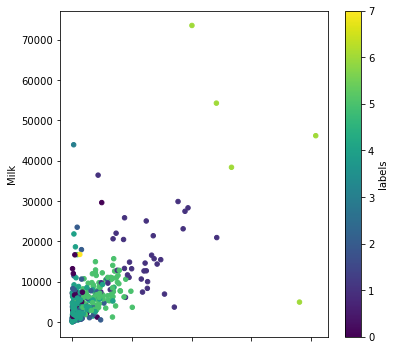

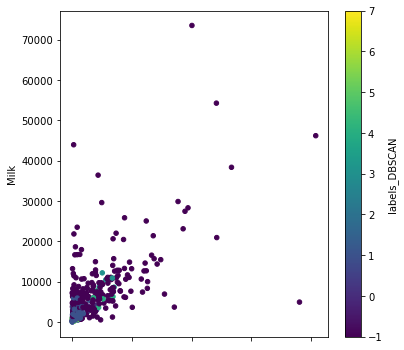

In [18]:
# Your code here:
#with k-means
data.plot.scatter(subplots=True, figsize=(6, 6), x="Detergents_Paper", y="Milk", c="labels", colormap="viridis")
#with dbscan-means
data.plot.scatter(subplots=True, figsize=(6, 6), x="Detergents_Paper", y="Milk", c="labels_DBSCAN", colormap="viridis")

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

array([<AxesSubplot:xlabel='Grocery', ylabel='Fresh'>], dtype=object)

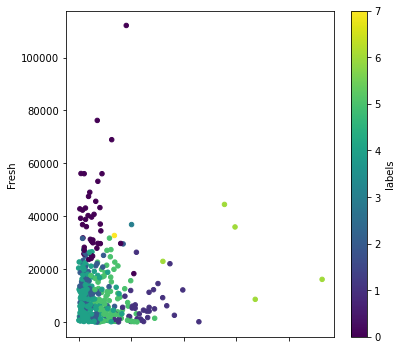

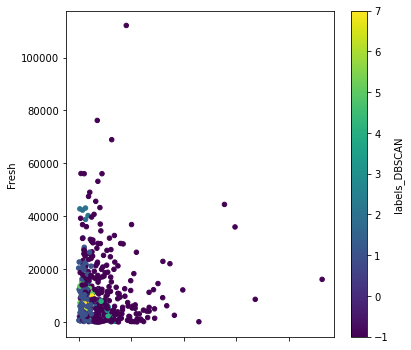

In [19]:
# Your code here:
#with k-means
data.plot.scatter(subplots=True, figsize=(6, 6), x="Grocery", y="Fresh", c="labels", colormap="viridis")
#with dbscan-means
data.plot.scatter(subplots=True, figsize=(6, 6), x="Grocery", y="Fresh", c="labels_DBSCAN", colormap="viridis")

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

array([<AxesSubplot:xlabel='Frozen', ylabel='Delicassen'>], dtype=object)

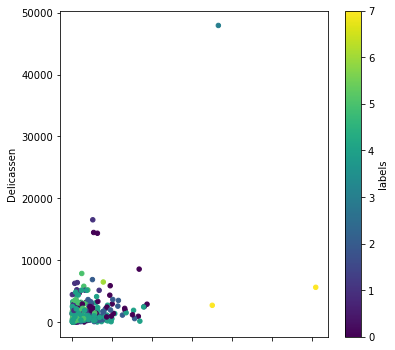

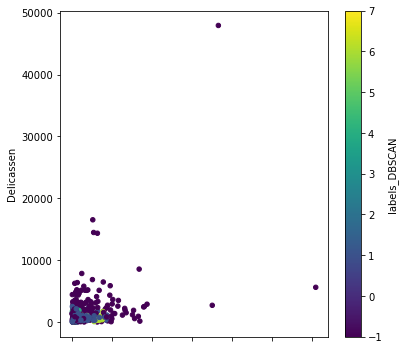

In [20]:
# Your code here:
#with k-means
data.plot.scatter(subplots=True, figsize=(6, 6), x="Frozen", y="Delicassen", c="labels", colormap="viridis")
#with dbscan-means
data.plot.scatter(subplots=True, figsize=(6, 6), x="Frozen", y="Delicassen", c="labels_DBSCAN", colormap="viridis")

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [48]:
print(data.groupby(['labels']).mean())
print(data.groupby(['labels_DBSCAN']).mean())

         Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       1.048780  2.780488  39870.292683   4916.853659   5740.585366   
1       2.000000  2.138889   5766.527778  15820.944444  24570.277778   
2       1.068966  1.310345  10277.310345   3237.275862   4136.655172   
3       1.000000  3.000000  36847.000000  43950.000000  20170.000000   
4       1.000000  3.000000   8816.377143   2952.085714   3427.154286   
5       2.000000  2.870968   8515.795699   7525.021505  11567.827957   
6       2.000000  2.800000  25603.000000  43460.600000  61472.200000   
7       1.000000  2.500000  22015.500000   9937.000000   7844.000000   

              Frozen  Detergents_Paper    Delicassen  labels_DBSCAN   labels3  \
labels                                                                          
0        6566.926829        901.268293   2595.951220      -0.536585  0.121951   
1        1709.027778      11677.2222

Which algorithm appears to perform better?

In [22]:
# Your observations here
##first one shows more clusters 

# Challenge 6 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [23]:
kmeans.inertia_

1050.0903086785106

In [24]:
# Your code here
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(customers_scale) 
    wcss.append(kmeans.inertia_)

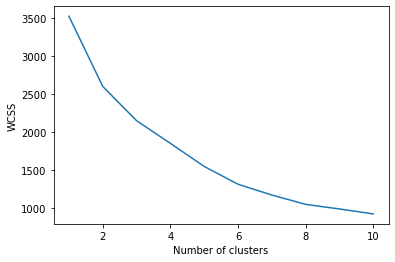

In [25]:
# Your comment here
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [40]:
# Your code here
# Your code here:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)
y_kmeans

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

array([<AxesSubplot:xlabel='Grocery', ylabel='Fresh'>], dtype=object)

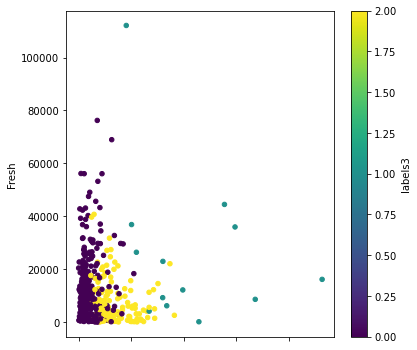

In [41]:
data.plot.scatter(subplots=True, figsize=(6, 6), x="Grocery", y="Fresh", c="labels3", colormap="viridis")

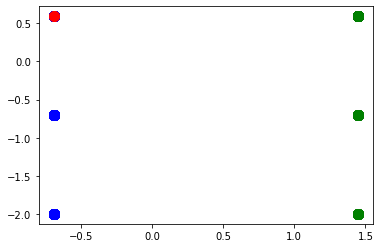

In [45]:
plt.scatter(customers_scale[y_kmeans1==0, 0], customers_scale[y_kmeans1==0, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(customers_scale[y_kmeans1==1, 0], customers_scale[y_kmeans1==1, 1], s=100, c='red', label ='Cluster 2')
plt.scatter(customers_scale[y_kmeans1==2, 0], customers_scale[y_kmeans1==2, 1], s=100, c='green', label ='Cluster 2')

In [29]:
# Your comment here


# Challenge 7 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [30]:
# Your code here
dbscan_cluster = DBSCAN(eps=0.6, min_samples=10)
dbscan_cluster.fit(customers_scale)
data['labels_DBSCAN1']=dbscan_cluster1.labels_

array([<AxesSubplot:xlabel='Grocery', ylabel='Fresh'>], dtype=object)

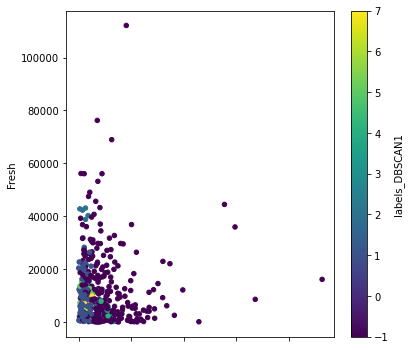

In [31]:
data.plot.scatter(subplots=True, figsize=(6, 6), x="Grocery", y="Fresh", c="labels_DBSCAN1", colormap="viridis")

In [32]:
# Your comment here